In [ ]:
# !pip install geopandas plotly_express sentinelhub requests sentinelhub[AWS] rasterio seaborn opencv-python

In [2]:
import pandas as pd
import numpy as np
#import geopandas as gpd
import rasterio
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image
#import folium
#import plotly_express as px
import os
import warnings
import datetime
warnings.filterwarnings('ignore')
import requests
from requests import exceptions
from json import JSONDecodeError
from sentinelhub import WebFeatureService, BBox, CRS, DataCollection, SHConfig
from sentinelhub.aws import AwsTile
from sentinelhub.aws import AwsTileRequest
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask
import seaborn as sns
from rasterio.merge import merge
#import cv2
from time import time

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask

## Set up Request query to Sentinelhub

In [4]:
from sentinelhub import SHConfig
config = SHConfig()

In [ ]:
# from sentinelhub import SHConfig

# config = SHConfig()

# config.instance_id = '47ba9609-d691-4add-8b31-22f46dde63e8'
# config.sh_client_id = '7a24c8e7-a5d9-403f-94b8-65a5f24110a4'
# config.sh_client_secret = 'FQGJ6uy*#}/O./gv1G+DzU6;(Mxhpev.@,xd;!Us'

# config.save()

In [5]:
config.instance_id = "47ba9609-d691-4add-8b31-22f46dde63e8"
config.aws_access_key_id = "7a24c8e7-a5d9-403f-94b8-65a5f24110a4"
config.aws_secret_access_key = "FQGJ6uy*#}/O./gv1G+DzU6;(Mxhpev.@,xd;!Us"

In [6]:
config.save()

In [7]:
from sentinelhub import WebFeatureService, BBox, CRS, DataCollection, SHConfig
if config.instance_id == '':
    print("Warning! To use WFS functionality, please configure the `instance_id`.")

### Retriving Wolf Volcano Images

In [ ]:
search_bbox = BBox(bbox=[-91.437836,-0.171661,-91.138458,0.090637], crs=CRS.WGS84)

search_time_interval = ('2021-11-20T00:00:00', '2022-05-27T23:59:59')


wfs_iterator = WebFeatureService(
    search_bbox,
    search_time_interval,
    data_collection=DataCollection.SENTINEL2_L1C,
    maxcc=1.0,
    config=config
)

for tile_info in wfs_iterator:
    print(tile_info)

In [ ]:
result = []
for tile_info in wfs_iterator:
    if tile_info['properties']['cloudCoverPercentage'] < 50:
        if 'MXV' in tile_info['properties']['id'] or 'MYV' in tile_info['properties']['id']:
            result.append(tile_info['properties'])

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
result = pd.DataFrame(result)
result

In [ ]:
result = result[result['date'].isin(['2021-11-22', '2022-01-11','2022-02-25','2022-03-17','2022-05-01'])]

In [ ]:
len(result.index)

In [ ]:
result = result.reset_index()

In [ ]:
result.drop('index', axis=1, inplace=True)

In [ ]:
result

### Retriving Cotopaxi, Pichincha, Illiniza, Quilotoa, etc Images

In [ ]:
search_bbox = BBox(bbox=[-78.497143,-0.730743,-78.378353,-0.638567], crs=CRS.WGS84)

search_time_interval = ('2021-07-05T00:00:00', '2021-07-06T23:59:59')


wfs_iterator = WebFeatureService(
    search_bbox,
    search_time_interval,
    data_collection=DataCollection.SENTINEL2_L1C,
    maxcc=1.0,
    config=config
)

for tile_info in wfs_iterator:
    print(tile_info)

In [ ]:
result = []
for tile_info in wfs_iterator:
    if tile_info['properties']['cloudCoverPercentage'] < 100:
        if 'MXV' in tile_info['properties']['id'] or 'MQV' in tile_info['properties']['id']:
            result.append(tile_info['properties'])

In [ ]:
result = pd.DataFrame(result)
result

### Retriving Tungurahua, Chimborazo, etc Images

In [ ]:
search_bbox = BBox(bbox=[-78.578339,-1.554375,-78.388824,-1.404736], crs=CRS.WGS84)

search_time_interval = ('2021-07-05T00:00:00', '2021-07-06T23:59:59')


wfs_iterator = WebFeatureService(
    search_bbox,
    search_time_interval,
    data_collection=DataCollection.SENTINEL2_L1C,
    maxcc=1.0,
    config=config
)

for tile_info in wfs_iterator:
    print(tile_info)

In [ ]:
result = []
for tile_info in wfs_iterator:
    if tile_info['properties']['cloudCoverPercentage'] < 100:
        if 'MXV' in tile_info['properties']['id'] or 'MQU' in tile_info['properties']['id']:
            result.append(tile_info['properties'])

In [ ]:
result = pd.DataFrame(result)
result

In [ ]:
bands = ['B02','B03','B04','B08','B8A','B11','B12']
metafiles = ['tileInfo', 'preview', 'qi/MSK_CLOUDS_B00']
data_folder = 'D:\Thesis Master\sentinel'

for tile_id in result['id']:
  tile_name, time, aws_index = AwsTile.tile_id_to_tile(tile_id)
  
  request = AwsTileRequest(
      tile=tile_name,
      time=time,
      aws_index=aws_index,
      bands=bands,
      metafiles=metafiles,
      data_folder=data_folder,
      data_collection=DataCollection.SENTINEL2_L1C
  )

  request.save_data()

### Wolf

In [ ]:
results2021 = []
path = 'D:\\Thesis Master\\sentinel\\15MXV,2021-11-22,0\\'
for files in os.listdir(path):
    if files.endswith('.jp2'):
        with rasterio.open(path+'/' + files) as f:
            results2021.append(f.read(1))

In [ ]:
results11 = []
path = 'D:\\Thesis Master\\sentinel\\15MXV,2022-01-11,0\\'
for files in os.listdir(path):
    if files.endswith('.jp2'):
        with rasterio.open(path+'/' + files) as f:
            results11.append(f.read(1))

In [ ]:
results16 = []
path = 'D:\\Thesis Master\\sentinel\\15MXV,2022-01-16,0\\'
for files in os.listdir(path):
    if files.endswith('.jp2'):
        with rasterio.open(path+'/' + files) as f:
            results16.append(f.read(1))

In [ ]:
results25 = []
path = 'D:\\Thesis Master\\sentinel\\15MXV,2022-02-25,0\\'
for files in os.listdir(path):
    if files.endswith('.jp2'):
        with rasterio.open(path+'/' + files) as f:
            results25.append(f.read(1))

In [ ]:
results17 = []
path = 'D:\\Thesis Master\\sentinel\\15MXV,2022-03-17,0\\'
for files in os.listdir(path):
    if files.endswith('.jp2'):
        with rasterio.open(path+'/' + files) as f:
            results17.append(f.read(1))

In [ ]:
results1 = []
path = 'D:\\Thesis Master\\sentinel\\15MXV,2022-05-01,0'
for files in os.listdir(path):
    if files.endswith('.jp2'):
        with rasterio.open(path+'/' + files) as f:
            results1.append(f.read(1))

### Cotopaxi, Iliniza, etc

In [4]:
results202106 = []
path = 'D:\\Thesis Master\\sentinel\\17MQV,2021-07-05,0\\'
for files in os.listdir(path):
    if files.endswith('.jp2'):
        with rasterio.open(path+'/' + files) as f:
            results202106.append(f.read(1))

### Tungurahua, Chimborazo, etc

In [ ]:
results202107 = []
path = 'D:\\Thesis Master\\sentinel\\17MQU,2021-07-05,0\\'
for files in os.listdir(path):
    if files.endswith('.jp2'):
        with rasterio.open(path+'/' + files) as f:
            results202107.append(f.read(1))

## Quick look to Multiple bands Images of Galapagos Islands (Wolf Volcano)

### 2021-11-22

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(12, 5))
ax[0].imshow(results2021[0])
ax[1].imshow(results2021[1])
ax[2].imshow(results2021[2])
ax[3].imshow(results2021[3])

### 2022-01-11 

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12, 12))
ax[0].imshow(results11[4])
ax[1].imshow(results11[5])
ax[2].imshow(results11[6])

### 2022-01-16

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12, 12))
ax[0].imshow(results16[0])
ax[1].imshow(results16[1])
ax[2].imshow(results16[2])

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12, 12))
ax[0].imshow(results16[4])
ax[1].imshow(results16[5])
ax[2].imshow(results16[6])

In [ ]:
# results[4] - b8a
# results[5] - b11
# results[6] - b22

## Reshape for bands 8a, 11, 12 (Wolf Volcano)

In [ ]:
[len(a) for a in results2021]

In [ ]:
results2021[4].shape

### 2021-11-22

In [ ]:
new_width = int(results2021[4].shape[1]*2)
new_height = int(results2021[4].shape[0]*2)
results2021[4] = cv2.resize(results2021[4], (new_width, new_height))

In [ ]:
new_width = int(results2021[5].shape[1]*2)
new_height = int(results2021[5].shape[0]*2)
results2021[5] = cv2.resize(results2021[5], (new_width, new_height))

In [ ]:
new_width = int(results2021[6].shape[1]*2)
new_height = int(results2021[6].shape[0]*2)
results2021[6] = cv2.resize(results2021[4], (new_width, new_height))

### 2022-01-11

In [ ]:
new_width = int(results11[4].shape[1]*2)
new_height = int(results11[4].shape[0]*2)
results11[4] = cv2.resize(results11[4], (new_width, new_height))

In [ ]:
new_width = int(results11[5].shape[1]*2)
new_height = int(results11[5].shape[0]*2)
results11[5] = cv2.resize(results11[5], (new_width, new_height))

In [ ]:
new_width = int(results11[6].shape[1]*2)
new_height = int(results11[6].shape[0]*2)
results11[6] = cv2.resize(results11[6], (new_width, new_height))

### 2022-01-16

In [ ]:
new_width = int(results16[4].shape[1]*2)
new_height = int(results16[4].shape[0]*2)
results16[4] = cv2.resize(results16[4], (new_width, new_height))

In [ ]:
new_width = int(results16[5].shape[1]*2)
new_height = int(results16[5].shape[0]*2)
results16[5] = cv2.resize(results16[5], (new_width, new_height))

In [ ]:
new_width = int(results16[6].shape[1]*2)
new_height = int(results16[6].shape[0]*2)
results16[6] = cv2.resize(results16[6], (new_width, new_height))

### 2022-02-25

In [ ]:
new_width = int(results25[4].shape[1]*2)
new_height = int(results25[4].shape[0]*2)
results25[4] = cv2.resize(results25[4], (new_width, new_height))

In [ ]:
new_width = int(results25[5].shape[1]*2)
new_height = int(results25[5].shape[0]*2)
results25[5] = cv2.resize(results25[5], (new_width, new_height))

In [ ]:
new_width = int(results25[6].shape[1]*2)
new_height = int(results25[6].shape[0]*2)
results25[6] = cv2.resize(results25[6], (new_width, new_height))

### 2022-03-17

In [ ]:
new_width = int(results17[4].shape[1]*2)
new_height = int(results17[4].shape[0]*2)
results17[4] = cv2.resize(results17[4], (new_width, new_height))

In [ ]:
new_width = int(results17[5].shape[1]*2)
new_height = int(results17[5].shape[0]*2)
results17[5] = cv2.resize(results17[5], (new_width, new_height))

In [ ]:
new_width = int(results17[6].shape[1]*2)
new_height = int(results17[6].shape[0]*2)
results17[6] = cv2.resize(results17[6], (new_width, new_height))

### 2022-05-01

In [ ]:
new_width = int(results202106[4].shape[1]*2)
new_height = int(results202106[4].shape[0]*2)
results202106[4] = cv2.resize(results202106[4], (new_width, new_height))

In [ ]:
new_width = int(results202106[5].shape[1]*2)
new_height = int(results202106[5].shape[0]*2)
results202106[5] = cv2.resize(results202106[5], (new_width, new_height))

In [ ]:
new_width = int(results202106[6].shape[1]*2)
new_height = int(results202106[6].shape[0]*2)
results202106[6] = cv2.resize(results202106[6], (new_width, new_height))

### Reshape for bands 8a, 11, 12 (Cotopaxi Volcano)

In [5]:
new_width = int(results202106[4].shape[1]*2)
new_height = int(results202106[4].shape[0]*2)
results202106[4] = cv2.resize(results202106[4], (new_width, new_height))

In [6]:
new_width = int(results202106[5].shape[1]*2)
new_height = int(results202106[5].shape[0]*2)
results202106[5] = cv2.resize(results202106[5], (new_width, new_height))

In [7]:
new_width = int(results202106[6].shape[1]*2)
new_height = int(results202106[6].shape[0]*2)
results202106[6] = cv2.resize(results202106[6], (new_width, new_height))

### Reshape for bands 8a, 11, 12 (Tungurahua Volcano)

In [ ]:
new_width = int(results202107[4].shape[1]*2)
new_height = int(results202107[4].shape[0]*2)
results202107[4] = cv2.resize(results202107[4], (new_width, new_height))

In [ ]:
new_width = int(results202107[5].shape[1]*2)
new_height = int(results202107[5].shape[0]*2)
results202107[5] = cv2.resize(results202107[5], (new_width, new_height))

In [ ]:
new_width = int(results202107[6].shape[1]*2)
new_height = int(results202107[6].shape[0]*2)
results202107[6] = cv2.resize(results202107[6], (new_width, new_height))

# Satellite Band Images

In [ ]:
# False color(URBAN) = (12,11,4)
# natural = (b4+b3+b2)
# SWIR = (12, 8a, 4)
# Mousture Index = (8-11)/(8+4)
# ndwi = (b3-b8))/(b3+b8)
# ndvi2 = (8-4)/(8+4)
# Plants (8,4,3)

In [ ]:
false_color = (results2021[6]+results2021[5]+results2021[2])

In [ ]:
natural = (results2021[2]+results2021[1]+results2021[0])

In [ ]:
swir = (results2021[6]+results2021[4]+results2021[2])

In [ ]:
m = (results2021[3]+results2021[5])/(results2021[3]+results2021[2])

In [ ]:
ndwi = (results2021[1]-results2021[3])/(results2021[1]+results2021[3])

In [ ]:
ndwi2 = (results2021[3]-results2021[2])/(results2021[3]+results2021[2])

In [ ]:
plants = (results2021[3]+results2021[2]+results2021[1])

In [ ]:
#false_color11 = (results11[6]+results11[5]+results11[2])
# natural11 = (results11[2]+results11[1]+results11[0])
# swir11 = (results11[6]+results11[4]+results11[2])
# m11 = (results11[3]+results11[5])/(results11[3]+results11[2])
# m211 = (results11[4]+results11[5])/(results11[4]+results11[5])
# ndwi11 = (results11[1]-results11[3])/(results11[1]+results11[3])
# ndwi211 = (results11[3]-results11[2])/(results11[3]+results11[2])
# plants11 = (results11[3]+results11[2]+results11[1])

### Reshaping to check Volcano Wolf

In [ ]:
false_color = false_color[0:2000,7500:10500]
natural = natural[0:2000,7500:10500]
swir = swir[0:2000,7500:10500]
m = m[0:2000,7500:10500]
ndwi = ndwi[0:2000,7500:10500]
ndwi2 = ndwi2[0:2000,7500:10500]
plants = plants[0:2000,7500:10500]

In [ ]:
false_color11 = false_color11[0:2000,7500:10500]
natural11 = natural11[0:2000,7500:10500]
swir11 = swir11[0:2000,7500:10500]
m11 = m11[0:2000,7500:10500]
m211 = m211[0:2000,7500:10500]
ndwi11 = ndwi11[0:2000,7500:10500]
ndwi211 = ndwi211[0:2000,7500:10500]
plants11 = plants11[0:2000,7500:10500]

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
show(false_color, ax=ax)
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
show(natural, ax=ax)
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
show(swir, ax=ax)
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
show(m, ax=ax)
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
show(ndwi, ax=ax)
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
show(ndwi2, ax=ax)
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
show(plants, ax=ax)
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
show(false_color11, ax=ax)
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
show(natural11, ax=ax)
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
show(swir11, ax=ax)
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
show(m11, ax=ax)
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
show(ndwi11, ax=ax)
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
show(ndwi211, ax=ax)
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
show(plants11, ax=ax)
plt.show();

## Building Data Dataset for CNN

In [ ]:
natural2021 = (results2021[2]+results2021[1]+results2021[0])

In [ ]:
natural11 = (results11[2]+results11[1]+results11[0])

In [ ]:
swir16 = (results16[6]+results16[4]+results16[2])

In [ ]:
swir25 = (results16[6]+results16[4]+results16[2])

In [ ]:
swir17 = (results16[6]+results16[4]+results16[2])

In [ ]:
swir1 = (results16[6]+results16[4]+results16[2])

### Volcano Wolf

In [ ]:
natural2021 = natural2021[50:550,8500:9000]

In [ ]:
natural11 = natural11[50:550,8500:9000]

In [ ]:
swir16 = swir16[300:800,8700:9200]

In [ ]:
swir25 = swir25[300:800,8700:9200]

In [ ]:
swir17 = swir17[300:800,8700:9200]

In [ ]:
swir1 = swir1[300:800,8700:9200]

### Quick look

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
show(natural2021, ax=ax)
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
show(natural11, ax=ax)
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
show(swir16, ax=ax)
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
show(swir25, ax=ax)
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
show(swir17, ax=ax)
plt.show();

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
show(swir1, ax=ax)
plt.show();

In [ ]:
matplotlib.image.imsave('D:\\Thesis Master\\sentinel\\dataset\\wolf2021.png', natural2021)
matplotlib.image.imsave('D:\\Thesis Master\\sentinel\\dataset\\wolf11.png', natural11)
matplotlib.image.imsave('D:\\Thesis Master\\sentinel\\dataset\\wolf16.png', swir16)
matplotlib.image.imsave('D:\\Thesis Master\\sentinel\\dataset\\wolf25.png', swir25)
matplotlib.image.imsave('D:\\Thesis Master\\sentinel\\dataset\\wolf17.png', swir17)
matplotlib.image.imsave('D:\\Thesis Master\\sentinel\\dataset\\wolf1.png', swir1)

### Cotopaxi, Iliniza, etc

In [8]:
swir06 = (results202106[6]+results202106[4]+results202106[2])

In [9]:
natural06 = (results202106[2]+results202106[1]+results202106[0])

In [10]:
false_color06 = (results202106[6]+results202106[5]+results202106[2])

### Tungurahua, Chimborazo, etc 

In [ ]:
swir07 = (results202107[6]+results202107[4]+results202107[2])

In [ ]:
natural07 = (results202107[2]+results202107[1]+results202107[0])

In [ ]:
false_color07 = (results202107[6]+results202107[5]+results202107[2])

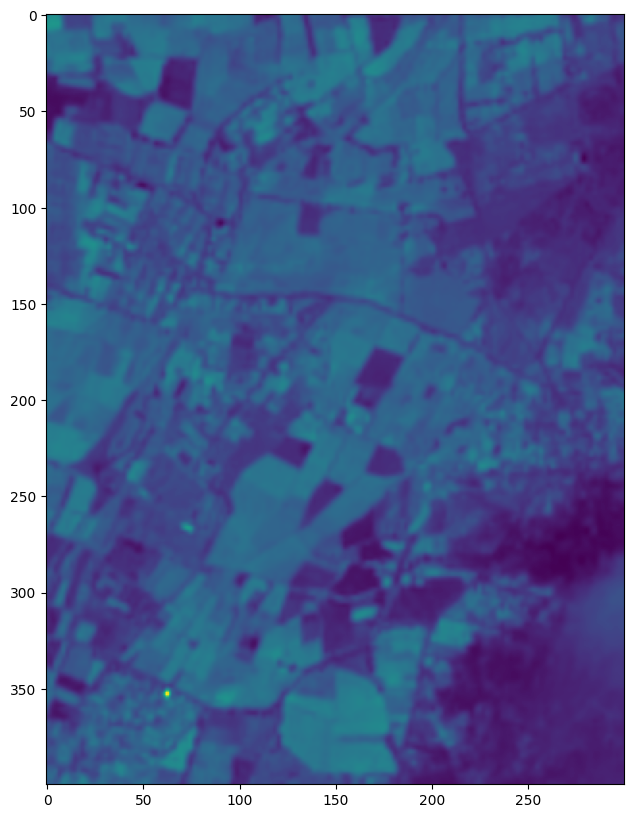

In [44]:
fig, ax = plt.subplots(figsize=(12, 10))
show(results202106[6][8400:8800,6700:7000], ax=ax)
plt.show();

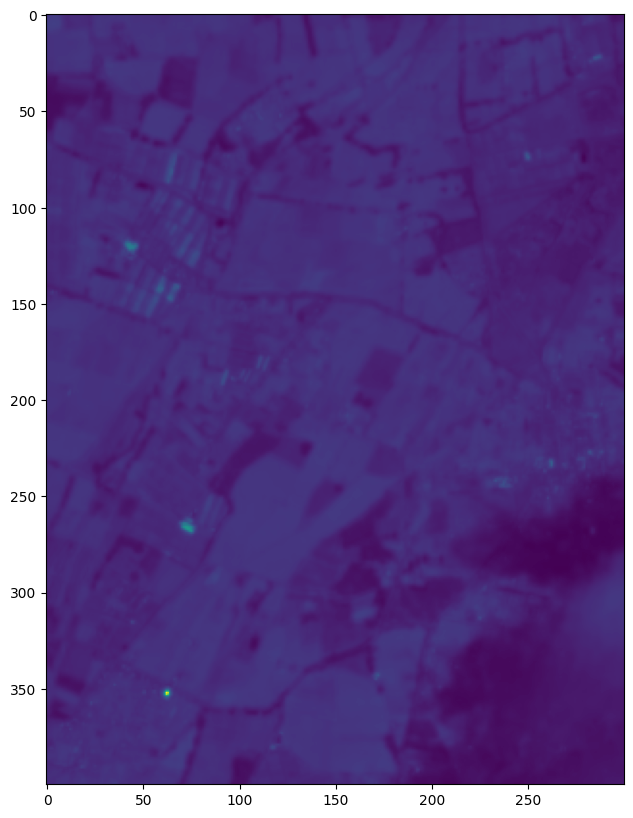

In [45]:
fig, ax = plt.subplots(figsize=(12, 10))
show(swir06[8400:8800,6700:7000], ax=ax)
plt.show();

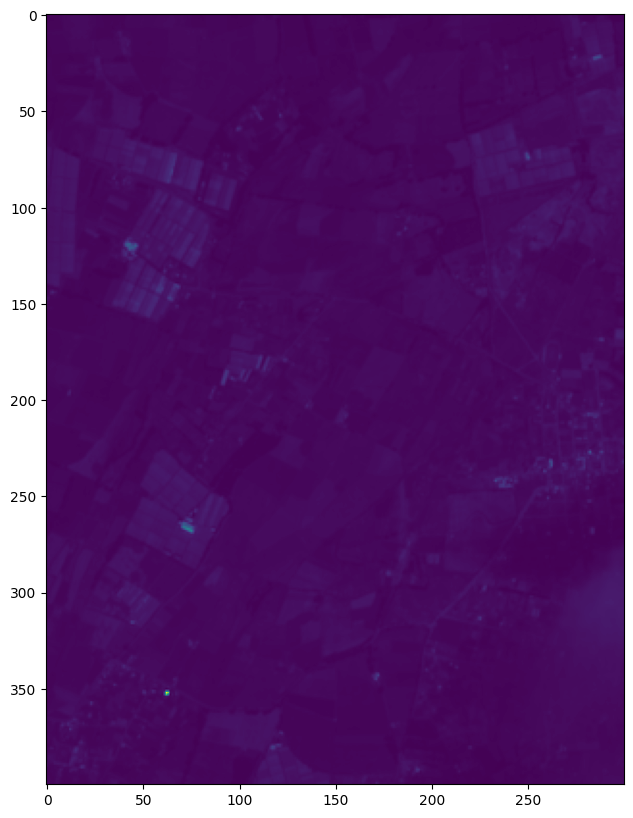

In [46]:
fig, ax = plt.subplots(figsize=(12, 10))
show(natural06[8400:8800,6700:7000], ax=ax)
plt.show();

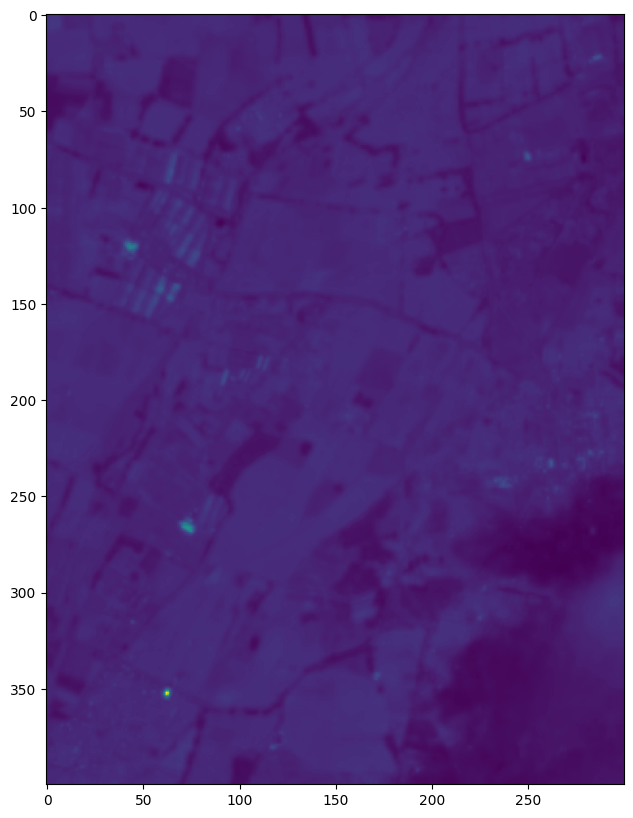

In [47]:
fig, ax = plt.subplots(figsize=(12, 10))
show(false_color06[8400:8800,6700:7000], ax=ax)
plt.show();

In [ ]:
Cotonatural06 = natural06[7100:8000,8000:9000]
quilotoanatural06 = natural06[9250:9750,3100:3600]
ilinizanatural06 = natural06[7100:7600,5200:5700]
pichincha06 = natural06[1700:2200,6350:6850]
chimborazo07 = natural07[5900:6700,3950:4650]
tungurahua = natural07[6100:6500,8190:8690]
elaltar = natural07[8100:9100,8100:9100]
carihuairazo = natural07[5300:5800,4650:5150]

In [ ]:
matplotlib.image.imsave('D:\\Thesis Master\\sentinel\\dataset\\cotopaxi2021.png', Cotonatural06)
matplotlib.image.imsave('D:\\Thesis Master\\sentinel\\dataset\\quilotoa2021.png', quilotoanatural06)
matplotlib.image.imsave('D:\\Thesis Master\\sentinel\\dataset\\iliniza2021.png', ilinizanatural06)
matplotlib.image.imsave('D:\\Thesis Master\\sentinel\\dataset\\pichincha2021.png', pichincha06)
matplotlib.image.imsave('D:\\Thesis Master\\sentinel\\dataset\\chimborazo2021.png',chimborazo07)
matplotlib.image.imsave('D:\\Thesis Master\\sentinel\\dataset\\tungurahua2021.png',tungurahua)
matplotlib.image.imsave('D:\\Thesis Master\\sentinel\\dataset\\elaltar2021.png',elaltar)
matplotlib.image.imsave('D:\\Thesis Master\\sentinel\\dataset\\carihuairazo2021.png',carihuairazo)

# CNN Detection of Volcanoes Eruption

In [8]:
from skimage.io import imread

In [13]:
images = {'C:\\Users\\Erick\\Downloads\\Thesis Master\\sentinel\\dataset\\carihuairazo2021.png': 'No eruption',
    'C:\\Users\\Erick\\Downloads\\Thesis Master\\sentinel\\dataset\\wolf2021.png': 'No eruption',
    'C:\\Users\\Erick\\Downloads\\Thesis Master\\sentinel\\dataset\\cotopaxi2021.png': 'No eruption',
    'C:\\Users\\Erick\\Downloads\\Thesis Master\\sentinel\\dataset\\quilotoa2021.png': 'No eruption',
    'C:\\Users\\Erick\\Downloads\\Thesis Master\\sentinel\\dataset\\iliniza2021.png': 'No eruption',
    'C:\\Users\\Erick\\Downloads\\Thesis Master\\sentinel\\dataset\\chimborazo2021.png': 'No eruption',
    'C:\\Users\\Erick\\Downloads\\Thesis Master\\sentinel\\dataset\\wolf11.png': 'Eruption',
    'C:\\Users\\Erick\\Downloads\\Thesis Master\\sentinel\\dataset\\wolf25.png': 'Eruption',
    'C:\\Users\\Erick\\Downloads\\Thesis Master\\sentinel\\dataset\\elaltar2021.png': 'No eruption'}

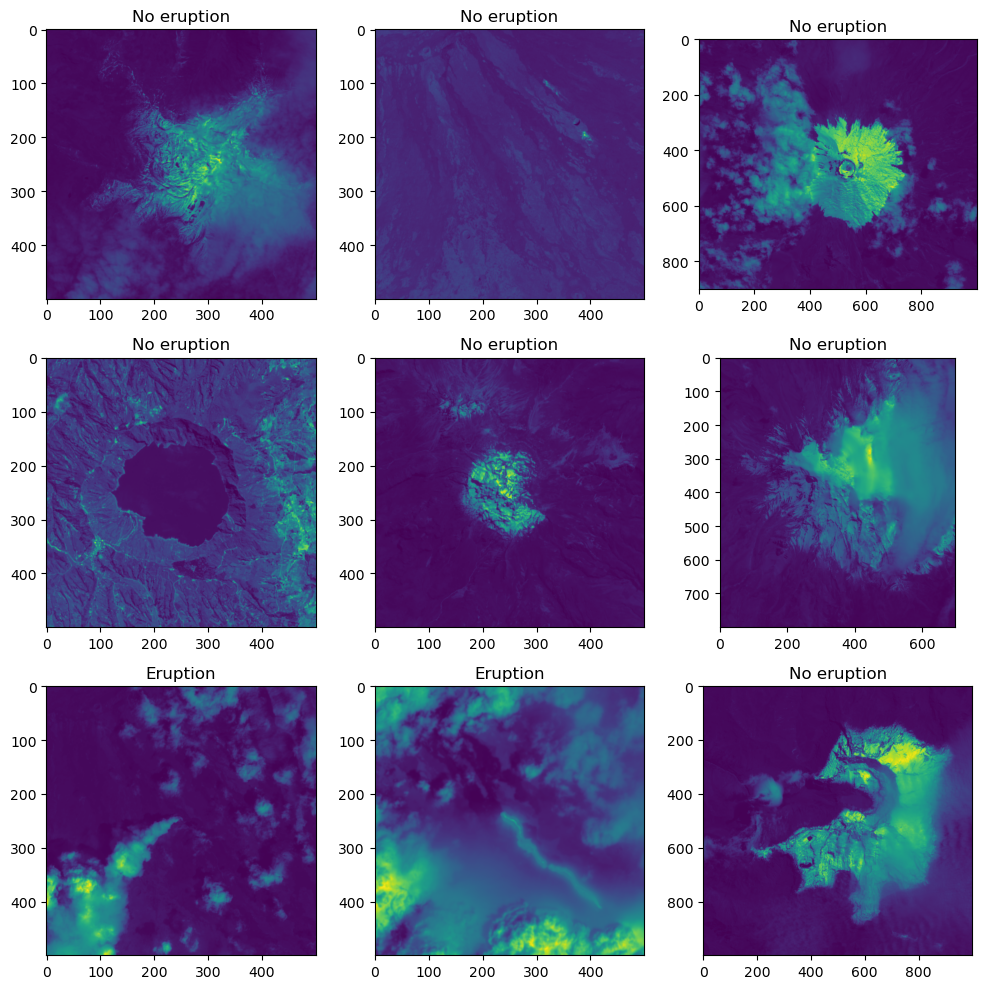

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
axes = axes.flatten()
for i, image in enumerate(images):
  axes[i].imshow(imread(image))
  axes[i].set_title(images[image])
fig.tight_layout()

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmentator = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=[0.3, 1.],
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='reflect',
)

In [7]:
from netCDF4 import Dataset

In [8]:
from ai4eo.preprocessing import ImageLoader
import random

In [ ]:
train_path = {'D:\\Thesis Master\\cnndataset\\training\\eruption\\wolf1.png'}

In [ ]:
train_path

In [ ]:
batch_size = 16
train_path = 'D:\\Thesis Master\\cnndataset\\training\\{label}\\*.png'
val_path = 'D:\\Thesis Master\\cnndataset\\training\\validation\\{label}\\*.png'
#train_path = '/content/drive/My Drive/volcanoes_detection/training_dataset_color_corr'
#val_path = '/content/drive/My Drive/volcanoes_detection/validation_dataset_color_corr'
test_path = ''

In [9]:
from ai4eo.preprocessing import ImageLoader
import random

batch_size = 16
train_path = 'D:\\Thesis Master\\cnndataset\\training\\{label}\\*.png'
val_path = 'D:\\Thesis Master\\cnndataset\\validation\\{label}\\*.png'
#train_path = '/content/drive/My Drive/volcanoes_detection/training_dataset_color_corr'
#val_path = '/content/drive/My Drive/volcanoes_detection/validation_dataset_color_corr'
test_path = ' ' 

# We want to resize the images to 224x224 pixels. They are smaller to reduce 
# execution time but big enough to preserve features and patterns.
target_size = (512,512)

def scale_image(image):
  # Convert image to float (we cannot perform 
  # floating operations with unsigned integers)
  image = image.astype(float) / 255.
  image = np.clip(image, 0., 1.)

  # The Neural Network learns better if we zero-center all channels (RGB) and 
  # set the standard deviation to 1. We calculated these arbitray value as mean
  # and standard deviation of the complete training dataset:
  image -= np.array([0.44101639, 0.45513914, 0.40195001])
  image /= np.array([0.28792392, 0.29775171, 0.29840153])

  # We want to make the model more robust, so we randomly add some noise:
  if random.random() > 0.8:
    image += np.random.uniform(-0.1, 0.1, size=(512, 512))[..., np.newaxis]

  return image

def scale(image):
  image = image.astype(float) / 255.
  image = np.clip(image, 0., 1.)
  
  return image

def process_image(image):
  image -= np.array([0.44101639, 0.45513914, 0.40195001])
  image /= np.array([0.28792392, 0.29775171, 0.29840153])

  # We want to make the model more robust, so we randomly add some noise:
  if random.random() > 0.8:
    image += np.random.uniform(-0.1, 0.1, size=(512, 512))[..., np.newaxis]
    
  return image


train_generator = ImageLoader(
    images=train_path, 
    batch_size=batch_size, 
    augmentator=augmentator, 
    balance=True, 
    label_encoding='binary', 
    classes=['no_eruption', 'eruption'],
    target_size=target_size,
    preprocess_input=scale_image,
    shuffle=True,
)
val_generator = ImageLoader(
    images=val_path, 
    batch_size=batch_size,
    label_encoding='binary',
    classes=['no_eruption', 'eruption'],
    target_size=target_size,
    #preprocess_input=scale_image_noise,
    preprocess_input = scale_image,
    shuffle=True,
)

test_generator = ImageLoader(
    images=val_path, 
    batch_size=batch_size,
    label_encoding='binary',
    classes=['no_eruption', 'eruption'],
    target_size=target_size,
    preprocess_input=scale,
    shuffle=True,
)

AttributeError: 'FileSet' object has no attribute 'to_dataframe'

In [18]:
batch

NameError: name 'batch' is not defined

In [ ]:
from collections import namedtuple
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
from random import Random

import cv2 as cv
from tensorflow.keras.utils import Sequence
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rasterio as rio
from rasterio.windows import Window
from shapely.geometry import box as Box
from sklearn.preprocessing import label_binarize
from typhon.files import FileSet
from typhon.plots import get_subplot_arrangement

In [13]:
batch_size = 16
#train_path = '/content/drive/My Drive/volcanoes_detection/training_dataset'
#val_path = '/content/drive/My Drive/volcanoes_detection/validation_dataset'
train_path = 'D:\\Thesis Master\\cnndataset\\training\\{label}\\*.png'
val_path = 'D:\\Thesis Master\\cnndataset\\validation\\{label}\\*.png'
test_path = ' ' 
target_size = (224,224)

datagen = ImageDataGenerator(
    #rescale = 2./255,
    preprocessing_function = scale_image,
    rotation_range = 45,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'reflect'
    
)

val_datagen = ImageDataGenerator(
    preprocessing_function = scale_image
)

In [14]:
from ai4eo.preprocessing import ImageLoader

train_generator = ImageLoader(
    'D:\\Thesis Master\\cnndataset\\training\\{label}\\*.png', 
    batch_size=16, augmentator=datagen, balance=True, label_encoding='binary'
)
val_generator = ImageLoader(
    'D:\\Thesis Master\\cnndataset\\validation\\{label}\\*.png', 
    batch_size=16, augmentator=val_datagen, balance=True, label_encoding='binary'
)

train_generator_1 = datagen.flow_from_directory(
    train_path,
    target_size = target_size,
    color_mode = 'rgb',
    classes = ['no_eruption', 'eruption'],
    class_mode = 'binary',
    batch_size = batch_size,
    shuffle = True
)

AttributeError: can't delete attribute